Перші 8 рядків набору даних:
   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414

Імена стовпців набору даних:
['Id', 'Name', 'Year', 'Gender', 'Count']

Кількість унікальних жіночих імен: 64911
Кількість унікальних чоловічих імен: 39199

5 найпопулярніших чоловічих імен у 2010 році:
Name
Jacob      22082
Ethan      17985
Michael    17308
Jayden     17152
William    17030
Name: Count, dtype: int64

Найпопулярніше ім’я за результатами одного року:
Name      Linda
Gender        F
Year       1947
Count     99680
Name: 431052, dtype: object

Найпопулярніше ім’я в році 2008:
Name      Jacob
Gender        M
Count     22568
Name: 1608302, dtype: object

Рік, коли ім’я 'Jacob' було найпопулярнішим серед жіночих імен: 

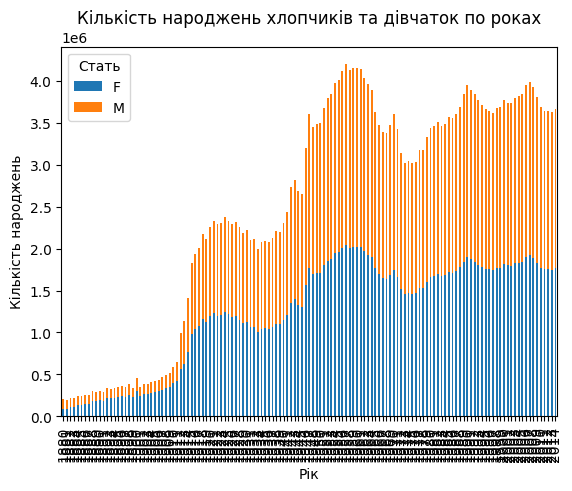


Кількість гендерно нейтральних імен: 73557

Кількість років спостереження: 135

Найпопулярніше серед непопулярних імен:
Name     Roll
Count       5
Name: 3918, dtype: object


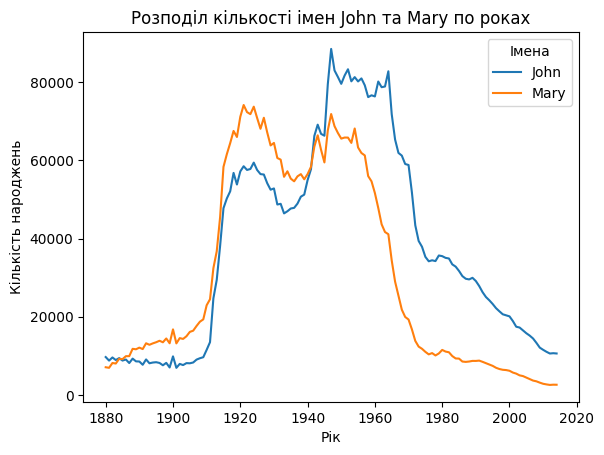

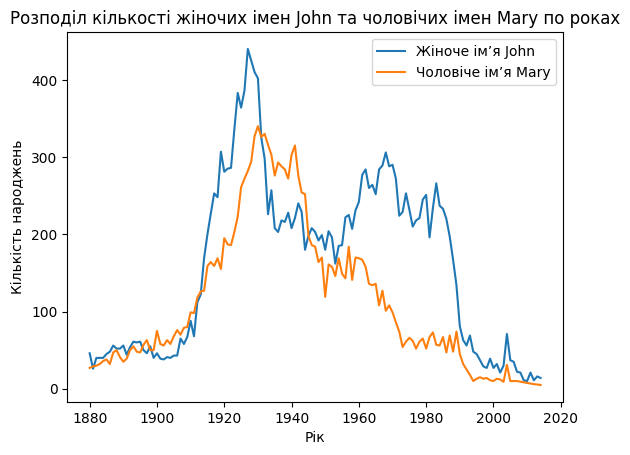


Найпопулярніші імена в кожному році:
         Year      Name Gender  Count
942      1880      John      M   9655
2938     1881      John      M   8769
4963     1882      John      M   9557
7116     1883      John      M   8894
9318     1884      John      M   9388
...       ...       ...    ...    ...
1657592  2010  Isabella      F  22883
1691633  2011    Sophia      F  21816
1725502  2012    Sophia      F  22267
1759186  2013    Sophia      F  21147
1792389  2014      Emma      F  20799

[135 rows x 4 columns]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

# Завантажемо набір даних про дитячі імена США з csv-файла
data = pd.read_csv("NationalNames.csv")

# 1. Виведіть перші 8 рядків набору даних
print("Перші 8 рядків набору даних:")
print(data.head(8))

# 3. Отримайте імена стовпців набору даних
print("\nІмена стовпців набору даних:")
print(data.columns.tolist())

# 6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних
unique_female_names = data[data['Gender'] == 'F']['Name'].unique()
unique_male_names = data[data['Gender'] == 'M']['Name'].unique()

print(f"\nКількість унікальних жіночих імен: {len(unique_female_names)}")
print(f"Кількість унікальних чоловічих імен: {len(unique_male_names)}")

# 7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році
popular_male_names_2010 = data[(data['Gender'] == 'M') & (data['Year'] == 2010)]
top_5_male_names_2010 = popular_male_names_2010.groupby('Name')['Count'].sum().nlargest(5)

print("\n5 найпопулярніших чоловічих імен у 2010 році:")
print(top_5_male_names_2010)

# 8. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)
most_popular_name = data.loc[data['Count'].idxmax()]

print("\nНайпопулярніше ім’я за результатами одного року:")
print(most_popular_name[['Name', 'Gender', 'Year', 'Count']])

# 12. Найдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен
most_unique_names_year = data['Year'].value_counts().idxmax()  # год с максимальным количеством уникальных имен
most_popular_name = data[data['Year'] == most_unique_names_year].loc[data[data['Year'] == most_unique_names_year]['Count'].idxmax()]

print(f"\nНайпопулярніше ім’я в році {most_unique_names_year}:")
print(most_popular_name[['Name', 'Gender', 'Count']])

# 13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен
jacob_popularity = data[data['Name'] == 'Jacob']
jacob_year = jacob_popularity.loc[jacob_popularity['Count'].idxmax()]

print(f"\nРік, коли ім’я 'Jacob' було найпопулярнішим серед жіночих імен: {jacob_year['Year']}")

# 14. Знайти рік із найбільшою кількістю гендерно нейтральних імен
neutral_names = data.groupby('Name').filter(lambda x: len(x) > 1)  # фильтруем имена, которые есть и у мужчин, и у женщин
neutral_names_count = neutral_names['Year'].value_counts().idxmax()  # год с максимальным количеством гендерно нейтральных имен

print(f"\nРік із найбільшою кількістю гендерно нейтральних імен: {neutral_names_count}")

# 15. Знайдіть загальну кількість народжень за рік
births_per_year = data.groupby('Year')['Count'].sum().reset_index()

print("\nЗагальна кількість народжень за рік:")
print(births_per_year)

# 16. Знайдіть рік, коли народилося найбільше дітей
max_births_year = births_per_year.loc[births_per_year['Count'].idxmax()]

print(f"\nРік, коли народилося найбільше дітей: {max_births_year['Year']} з кількістю {max_births_year['Count']}")

# 17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року
gender_counts_per_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0)

print("\nКількість дівчаток та хлопчиків, які народились кожного року:")
print(gender_counts_per_year)

# 19. Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік
gender_counts_per_year.plot(kind='bar', stacked=True)
plt.title("Кількість народжень хлопчиків та дівчаток по роках")
plt.xlabel("Рік")
plt.ylabel("Кількість народжень")
plt.legend(title="Стать")
plt.show()

# 20. Підрахуйте кількість гендерно нейтральних імен
gender_neutral_names = data.groupby('Name').filter(lambda x: len(x) > 1)
print(f"\nКількість гендерно нейтральних імен: {gender_neutral_names['Name'].nunique()}")

# 22. Підрахуйте скільки років проводилось спостереження
years_of_observation = data['Year'].nunique()
print(f"\nКількість років спостереження: {years_of_observation}")

# 24. Знайти найпопулярніше серед непопулярних імен
# Непопулярне ім’я - ім’я, яке народжувалось менше 5 разів у кожному році
unpopular_names = data.groupby('Name').filter(lambda x: (x['Count'] < 6).all())

# Проверка на наличие непопулярных имен
if not unpopular_names.empty:
    most_popular_unpopular_name = unpopular_names.loc[unpopular_names['Count'].idxmax()]
    print("\nНайпопулярніше серед непопулярних імен:")
    print(most_popular_unpopular_name[['Name', 'Count']])
else:
    print("\nНемає непопулярних імен для аналізу.")
    
# 25. Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі
names_distribution = data[data['Name'].isin(['John', 'Mary'])]
names_distribution_pivot = names_distribution.pivot_table(index='Year', columns='Name', values='Count', aggfunc='sum', fill_value=0)

names_distribution_pivot.plot(kind='line')
plt.title("Розподіл кількості імен John та Mary по роках")
plt.xlabel("Рік")
plt.ylabel("Кількість народжень")
plt.legend(title="Імена")
plt.show()

# 26. Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках
female_john = data[(data['Name'] == 'John') & (data['Gender'] == 'F')]
male_mary = data[(data['Name'] == 'Mary') & (data['Gender'] == 'M')]
female_john_distribution = female_john.groupby('Year')['Count'].sum()
male_mary_distribution = male_mary.groupby('Year')['Count'].sum()

plt.plot(female_john_distribution.index, female_john_distribution, label='Жіноче ім’я John')
plt.plot(male_mary_distribution.index, male_mary_distribution, label='Чоловіче ім’я Mary')
plt.title("Розподіл кількості жіночих імен John та чоловічих імен Mary по роках")
plt.xlabel("Рік")
plt.ylabel("Кількість народжень")
plt.legend()
plt.show()

# 27. Знайти найпопулярніші імена в кожному році
most_popular_names_per_year = data.loc[data.groupby('Year')['Count'].idxmax()]

print("\nНайпопулярніші імена в кожному році:")
print(most_popular_names_per_year[['Year', 'Name', 'Gender', 'Count']])


In [2]:
N = (19+4)%5+1
print(N)

4
